<a href="https://colab.research.google.com/github/ankitg-02/sales_analysis/blob/main/Home_Office.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [5]:
#importing data from excelsheet
home_office_sales=pd.read_excel("/content/Sample-sales-data-excel.xls")
data=pd.DataFrame(home_office_sales)
data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7238,7239,CA-2016-101651,2016-12-24,2016-12-30,Standard Class,SC-20305,Sean Christensen,Consumer,United States,San Jose,...,95123,West,FUR-FU-10000771,Furniture,Furnishings,"Eldon 200 Class Desk Accessories, Smoke",43.960,7,0.0,18.4632
1065,1066,CA-2015-161263,2015-04-16,2015-04-21,Standard Class,TS-21160,Theresa Swint,Corporate,United States,Toledo,...,43615,East,OFF-FA-10003059,Office Supplies,Fasteners,Assorted Color Push Pins,1.448,1,0.2,0.2353
432,433,US-2016-123750,2016-04-15,2016-04-21,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,28052,South,OFF-ST-10000617,Office Supplies,Storage,Woodgrain Magazine Files by Perma,4.768,2,0.2,-0.7748
4777,4778,CA-2016-101630,2016-02-19,2016-02-23,Second Class,CK-12760,Cyma Kinney,Corporate,United States,Long Beach,...,11561,East,OFF-SU-10001664,Office Supplies,Supplies,Acme Office Executive Series Stainless Steel T...,25.710,3,0.0,6.6846
3791,3792,CA-2015-111325,2015-02-27,2015-02-28,First Class,BT-11395,Bill Tyler,Corporate,United States,Altoona,...,16602,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",4.419,3,0.7,-3.3879


In [6]:
home_office=data.groupby("Segment")
home_office_mod=home_office.get_group("Home Office")
home_office_mod

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.4720,3,0.20,9.9468
37,38,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,OFF-EN-10002986,Office Supplies,Envelopes,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.3280,9,0.20,35.4150
38,39,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.3600,2,0.00,6.4128
9976,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.5840,2,0.20,31.1980
9977,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7,0.00,0.0000
9978,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.3760,4,0.20,4.6816


In [7]:
home_office_mod.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [8]:
home_office_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1783 entries, 14 to 9979
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         1783 non-null   int64         
 1   Order ID       1783 non-null   object        
 2   Order Date     1783 non-null   datetime64[ns]
 3   Ship Date      1783 non-null   datetime64[ns]
 4   Ship Mode      1783 non-null   object        
 5   Customer ID    1783 non-null   object        
 6   Customer Name  1783 non-null   object        
 7   Segment        1783 non-null   object        
 8   Country        1783 non-null   object        
 9   City           1783 non-null   object        
 10  State          1783 non-null   object        
 11  Postal Code    1783 non-null   int64         
 12  Region         1783 non-null   object        
 13  Product ID     1783 non-null   object        
 14  Category       1783 non-null   object        
 15  Sub-Category   1783 non-n

In [9]:
for i in home_office_mod.columns:
  print(i,':','\n',home_office_mod[i].unique())


Row ID : 
 [  15   16   35 ... 9978 9979 9980]
Order ID : 
 ['US-2015-118983' 'CA-2017-107727' 'CA-2015-117415' 'US-2015-164175'
 'US-2017-119662' 'CA-2016-159695' 'US-2017-109484' 'CA-2017-161018'
 'CA-2016-158568' 'CA-2015-129476' 'US-2014-152030' 'US-2016-125969'
 'CA-2014-110072' 'CA-2016-158834' 'CA-2015-118948' 'CA-2015-137225'
 'CA-2014-158274' 'CA-2014-123260' 'CA-2015-102281' 'CA-2017-107720'
 'US-2017-100930' 'CA-2014-131926' 'CA-2016-110772' 'CA-2014-111003'
 'CA-2014-164973' 'CA-2016-129714' 'CA-2017-102946' 'CA-2015-122259'
 'CA-2014-101476' 'US-2016-123750' 'CA-2016-147375' 'CA-2016-109869'
 'US-2015-101399' 'CA-2017-140963' 'CA-2014-133753' 'CA-2017-127432'
 'CA-2017-113558' 'CA-2015-147851' 'CA-2017-162929' 'CA-2017-163020'
 'CA-2016-115917' 'US-2017-127719' 'CA-2017-126221' 'CA-2016-132661'
 'US-2016-156097' 'US-2017-106663' 'CA-2015-119291' 'CA-2014-113887'
 'CA-2014-104472' 'CA-2016-112942' 'CA-2014-117429' 'CA-2017-131954'
 'CA-2014-112326' 'CA-2015-144267' 'US-2017

In [10]:
home_office_mod.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,1783.000000,1783,1783,1783,1783,1783,1783,1783,1783,1783,...,1783.000000,1783,1783,1783,1783,1783,1783.000000,1783.000000,1783.000000,1783.000000
unique,NaN,909,NaN,NaN,4,148,148,1,1,264,...,NaN,4,1112,3,17,1106,NaN,NaN,NaN,NaN
top,NaN,US-2016-108504,NaN,NaN,Standard Class,MA-17560,Matt Abelman,Home Office,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Easy-staple paper,NaN,NaN,NaN,NaN
freq,NaN,11,NaN,NaN,1071,34,34,1783,1783,145,...,NaN,571,8,1079,270,13,NaN,NaN,NaN,NaN
mean,4968.565339,NaN,2016-06-01 10:59:49.904655104,2016-06-05 09:07:34.290521600,NaN,NaN,NaN,NaN,NaN,NaN,...,55051.998317,NaN,NaN,NaN,NaN,NaN,240.972041,3.782389,0.147128,33.818664
min,15.000000,NaN,2014-01-04 00:00:00,2014-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.990000,1.000000,0.000000,-3399.980000
25%,2583.500000,NaN,2015-08-08 00:00:00,2015-08-12 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,23464.000000,NaN,NaN,NaN,NaN,NaN,17.045000,2.000000,0.000000,1.984250
50%,4823.000000,NaN,2016-08-29 00:00:00,2016-09-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,55113.000000,NaN,NaN,NaN,NaN,NaN,52.440000,3.000000,0.000000,9.102000
75%,7624.500000,NaN,2017-05-22 00:00:00,2017-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90004.000000,NaN,NaN,NaN,NaN,NaN,210.906000,5.000000,0.200000,31.559850
max,9980.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99207.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,3919.988800


**Exploritory Data Analysis**

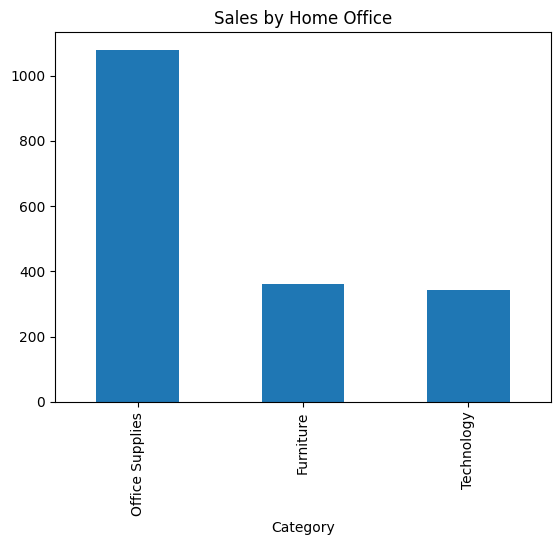

In [11]:
#category-wise sales distribution by home office
home_office_mod['Category'].value_counts().plot(kind='bar')
plt.title("Sales by Home Office")
plt.show()

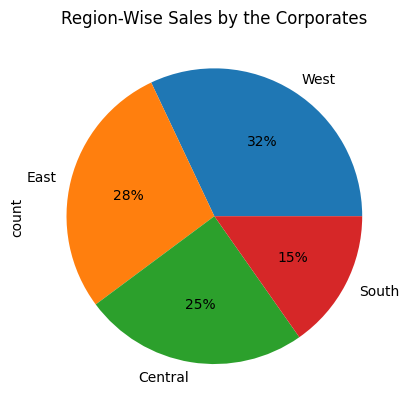

In [12]:
#distirbution of sales pattern about the region by the home office category
home_office_mod['Region'].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.title("Region-Wise Sales by the Corporates")
plt.show()

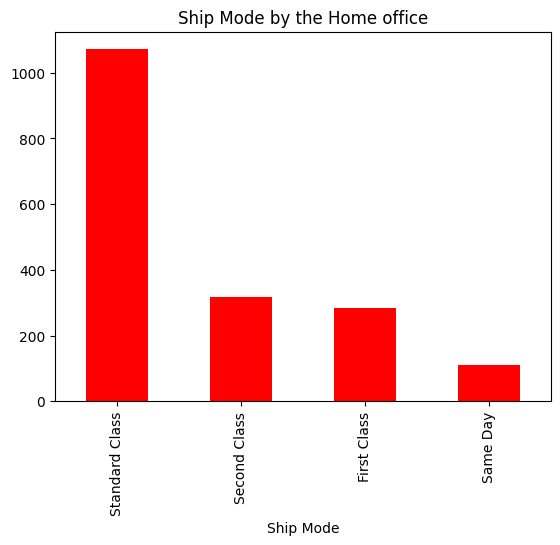

In [13]:
#Shipping mode of items ordered by home office segment
home_office_mod['Ship Mode'].value_counts().plot(kind='bar',color='red')
plt.title("Ship Mode by the Home office")
plt.show()

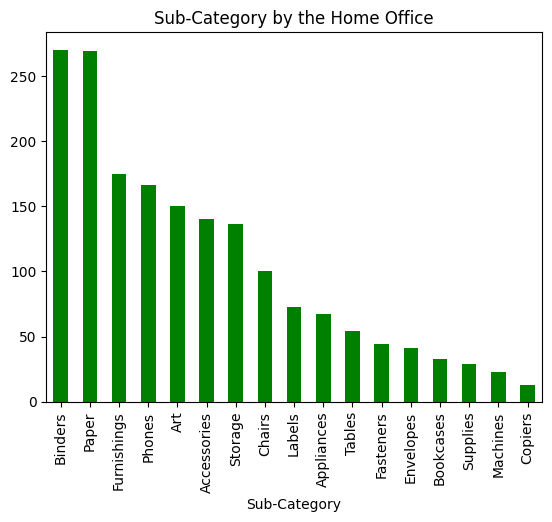

In [14]:
#sub-category items ordered by the Home office segment
home_office_mod['Sub-Category'].value_counts().plot(kind='bar',color='green')
plt.title("Sub-Category by the Home Office")
plt.show()

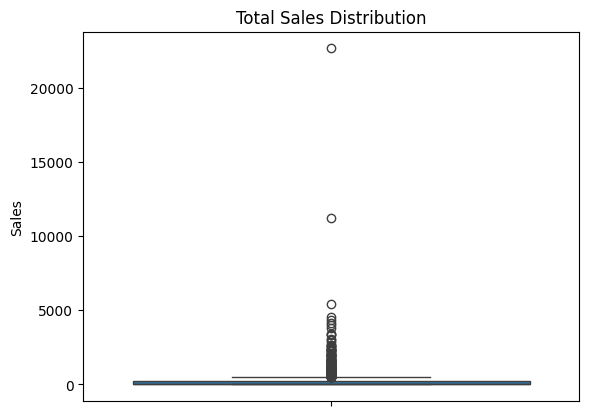

In [15]:
#sales pattern distribution
sns.boxplot(home_office_mod['Sales'])
plt.title("Total Sales Distribution")
plt.show()

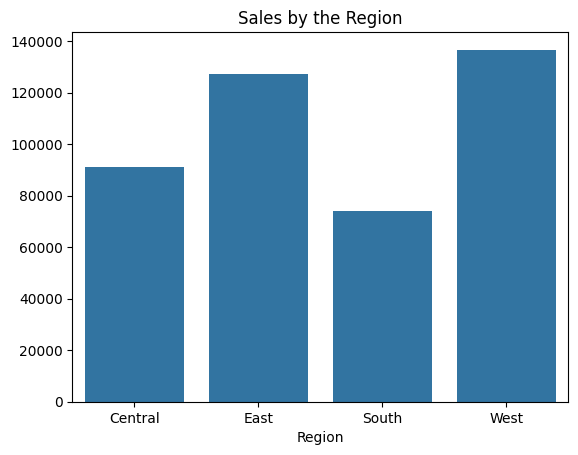

In [16]:
#sales distribution pattern region-wise
sales_region=home_office_mod.groupby('Region')['Sales'].sum()
sns.barplot(x=sales_region.index,y=sales_region.values)
plt.title("Sales by the Region")
plt.show()

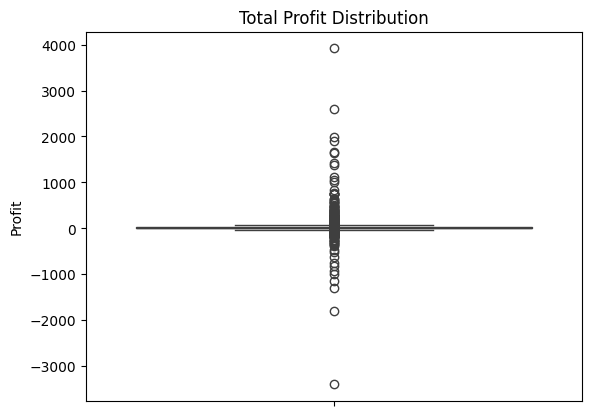

In [17]:
#profit pattern distribution
sns.boxplot(home_office_mod['Profit'])
plt.title("Total Profit Distribution")
plt.show()

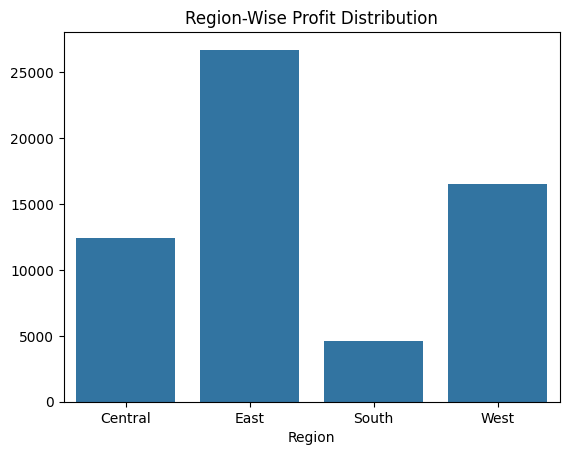

In [18]:
#profit pattern distribution
profit_by_region=home_office_mod.groupby('Region')['Profit'].sum()
sns.barplot(y=profit_by_region.values,x=profit_by_region.index)
plt.title("Region-Wise Profit Distribution")
plt.show()

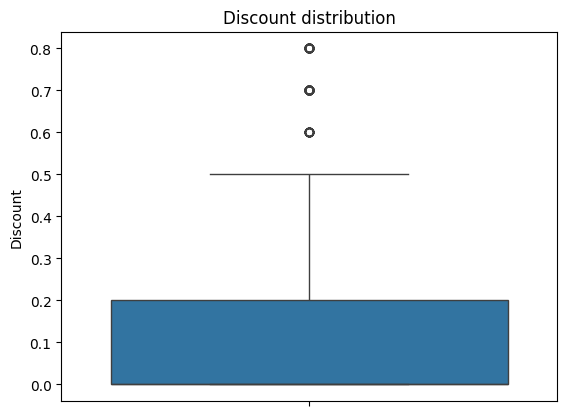

In [19]:
#discount pattern distribution
sns.boxplot(home_office_mod['Discount'])
plt.title("Discount distribution")
plt.show()

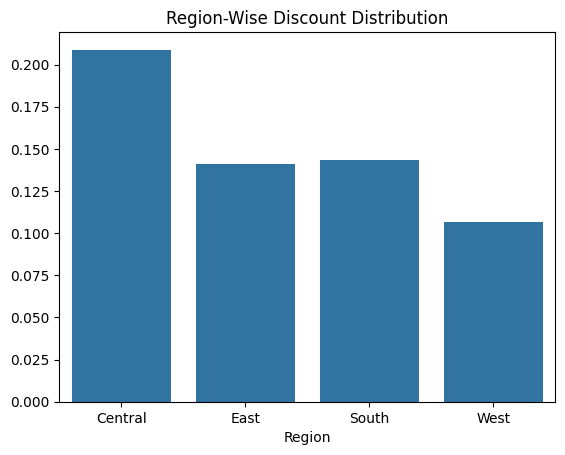

In [20]:
#discount pattern distribution
discount_by_region=home_office_mod.groupby('Region')['Discount'].mean()
sns.barplot(y=discount_by_region.values,x=discount_by_region.index)
plt.title("Region-Wise Discount Distribution")
plt.show()

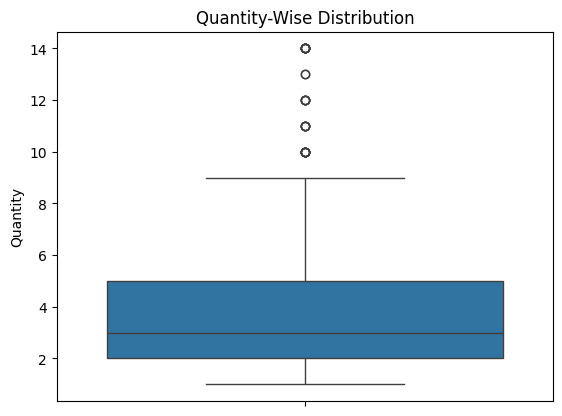

In [21]:
#quantity pattern distribution
sns.boxplot(home_office_mod['Quantity'])
plt.title("Quantity-Wise Distribution")
plt.show()

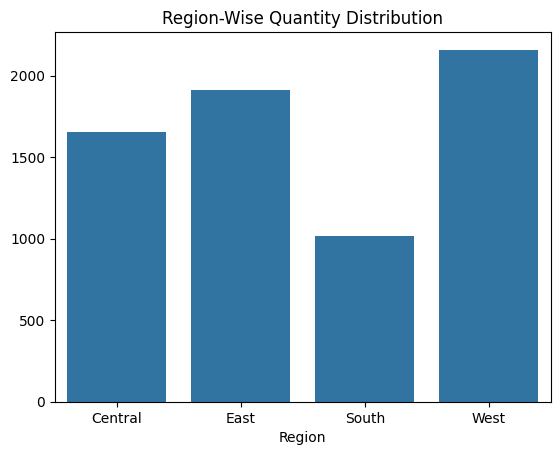

In [22]:
#quantity pattern distribution
quantity_by_region=home_office_mod.groupby('Region')['Quantity'].sum()
sns.barplot(y=quantity_by_region.values,x=quantity_by_region.index)
plt.title("Region-Wise Quantity Distribution")
plt.show()

In [23]:
oe=OrdinalEncoder()
home_office_mod['Ship Mode']=oe.fit_transform(home_office_mod[['Ship Mode']])
home_office_mod['City']=oe.fit_transform(home_office_mod[['City']])
home_office_mod['State']=oe.fit_transform(home_office_mod[['State']])
home_office_mod['Region']=oe.fit_transform(home_office_mod[['Region']])
home_office_mod['Category']=oe.fit_transform(home_office_mod[['Category']])
home_office_mod['Sub-Category']=oe.fit_transform(home_office_mod[['Sub-Category']])
home_office_mod['Segment']=oe.fit_transform(home_office_mod[['Segment']])
home_office_mod['Country']=oe.fit_transform(home_office_mod[['Country']])

<ipython-input-23-04f7ee526013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_office_mod['Ship Mode']=oe.fit_transform(home_office_mod[['Ship Mode']])
<ipython-input-23-04f7ee526013>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_office_mod['City']=oe.fit_transform(home_office_mod[['City']])
<ipython-input-23-04f7ee526013>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [24]:
home_office_mod.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2015-118983,2015-11-22,2015-11-26,3.0,HP-14815,Harold Pawlan,0.0,0.0,76.0,...,76106,0.0,OFF-AP-10002311,1.0,1.0,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,3.0,HP-14815,Harold Pawlan,0.0,0.0,76.0,...,76106,0.0,OFF-BI-10000756,1.0,3.0,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
34,35,CA-2017-107727,2017-10-19,2017-10-23,2.0,MA-17560,Matt Abelman,0.0,0.0,101.0,...,77095,0.0,OFF-PA-10000249,1.0,12.0,Easy-staple paper,29.4720,3,0.20,9.9468
37,38,CA-2015-117415,2015-12-27,2015-12-31,3.0,SN-20710,Steve Nguyen,0.0,0.0,101.0,...,77041,0.0,OFF-EN-10002986,1.0,7.0,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.3280,9,0.20,35.4150
38,39,CA-2015-117415,2015-12-27,2015-12-31,3.0,SN-20710,Steve Nguyen,0.0,0.0,101.0,...,77041,0.0,FUR-BO-10002545,0.0,4.0,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764


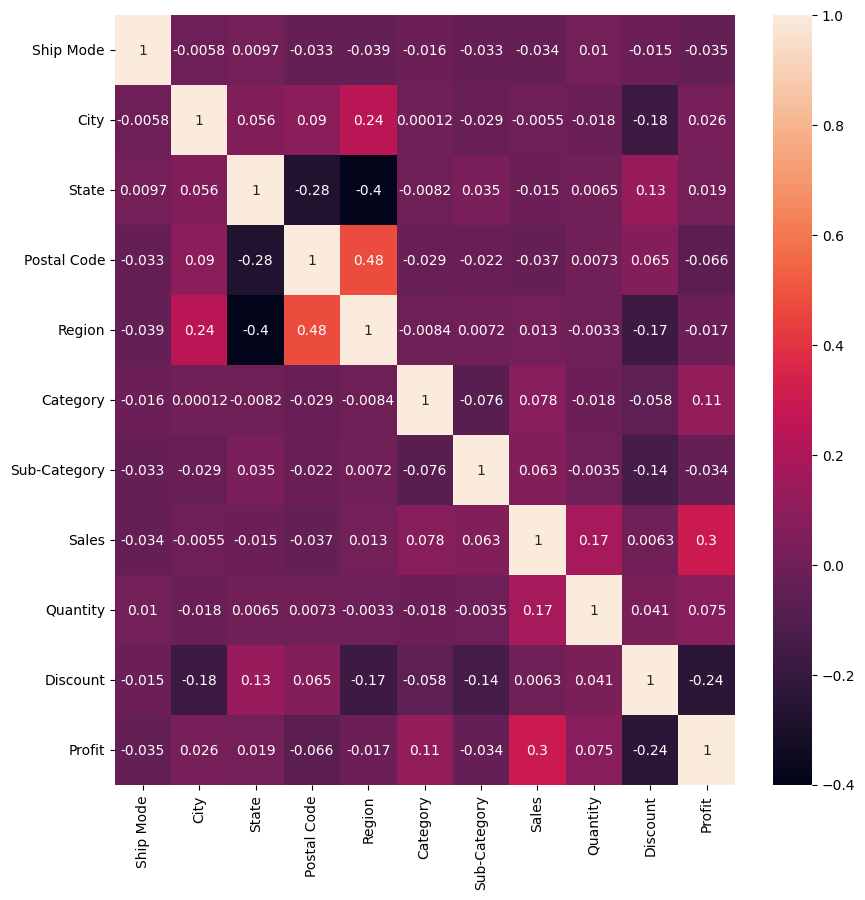

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(home_office_mod.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1).corr(),annot=True)
plt.show()

In [26]:
home_office_mod=pd.DataFrame(home_office_mod.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1))
home_office_mod.head()

,Ship Mode,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,3.0,76.0,40.0,76106,0.0,1.0,1.0,68.8100,5,0.80,-123.8580
15,3.0,76.0,40.0,76106,0.0,1.0,3.0,2.5440,3,0.80,-3.8160
34,2.0,101.0,40.0,77095,0.0,1.0,12.0,29.4720,3,0.20,9.9468
37,3.0,101.0,40.0,77041,0.0,1.0,7.0,113.3280,9,0.20,35.4150
38,3.0,101.0,40.0,77041,0.0,0.0,4.0,532.3992,3,0.32,-46.9764


In [27]:
#splitting the dataset
x=home_office_mod.drop(columns=['Sales','Profit'],axis='1')
y=home_office_mod['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Predictive Models**

In [28]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
model_4 = GradientBoostingRegressor()
model_5 = AdaBoostRegressor()
model_6 = DecisionTreeRegressor()
model_7 = KNeighborsRegressor()
model_8 = SVR()
model_9=Ridge()
model_10=Lasso()

In [30]:
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)
model_4.fit(x_train, y_train)
model_5.fit(x_train, y_train)
model_6.fit(x_train, y_train)
model_7.fit(x_train, y_train)
model_8.fit(x_train, y_train)
model_9.fit(x_train, y_train)
model_10.fit(x_train, y_train)

Lasso()

**Predictive Model's Performance**

In [31]:
pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(x_test)
pred_3 = model_3.predict(x_test)
pred_4=model_4.predict(x_test)
pred_5=model_5.predict(x_test)
pred_6=model_6.predict(x_test)
pred_7=model_7.predict(x_test)
pred_8=model_8.predict(x_test)
pred_9=model_9.predict(x_test)
pred_10=model_10.predict(x_test)

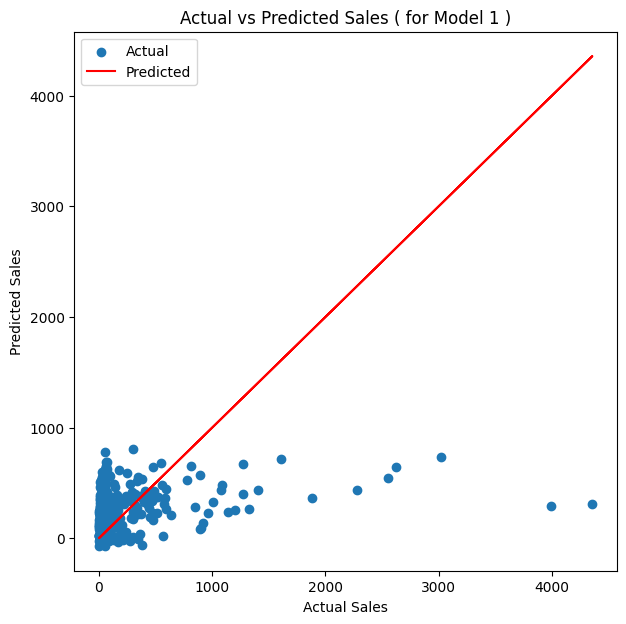

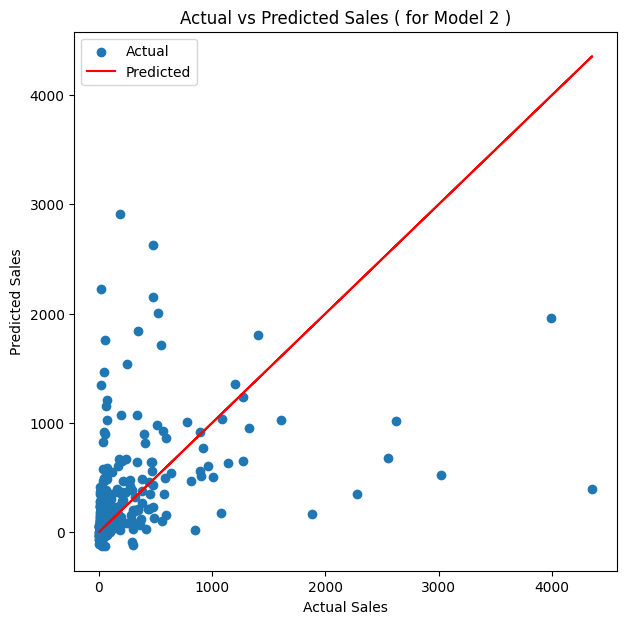

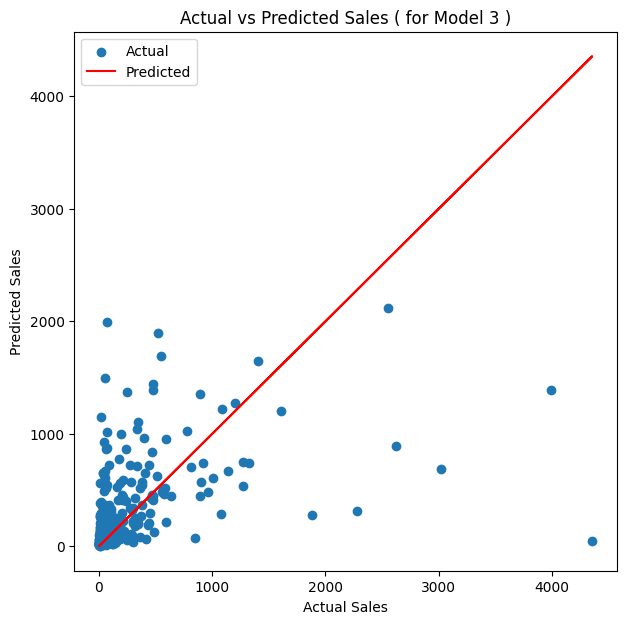

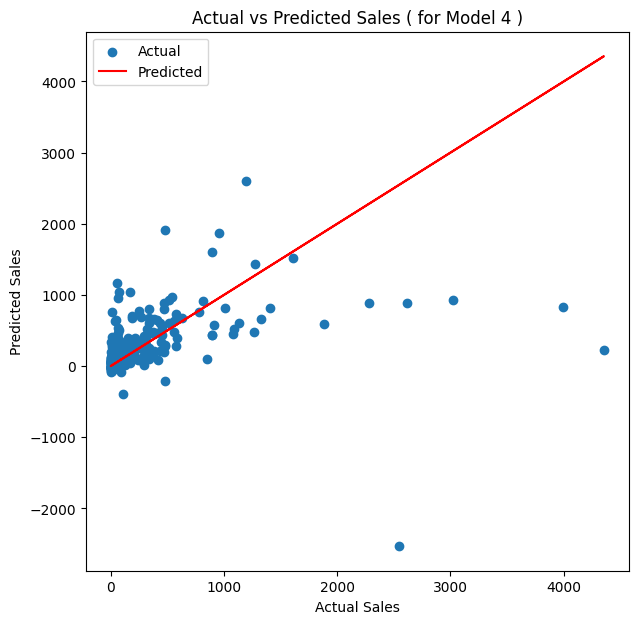

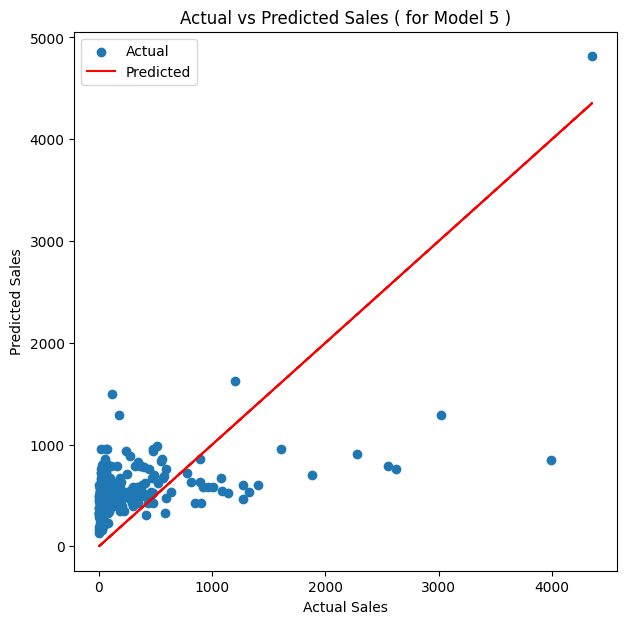

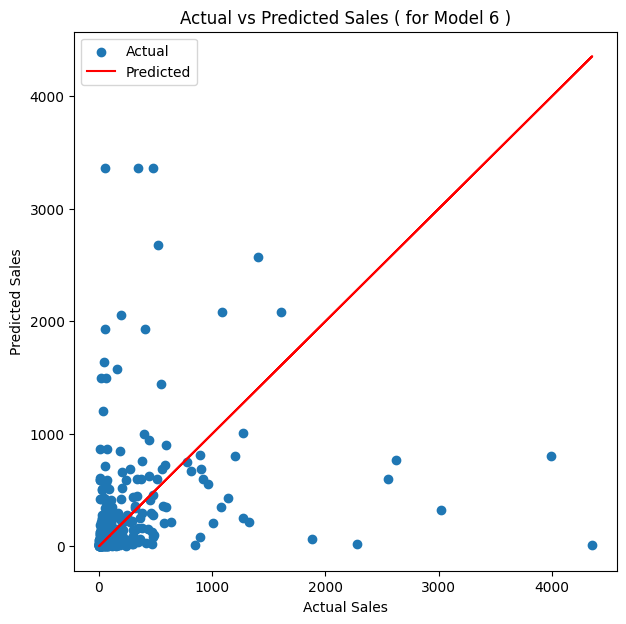

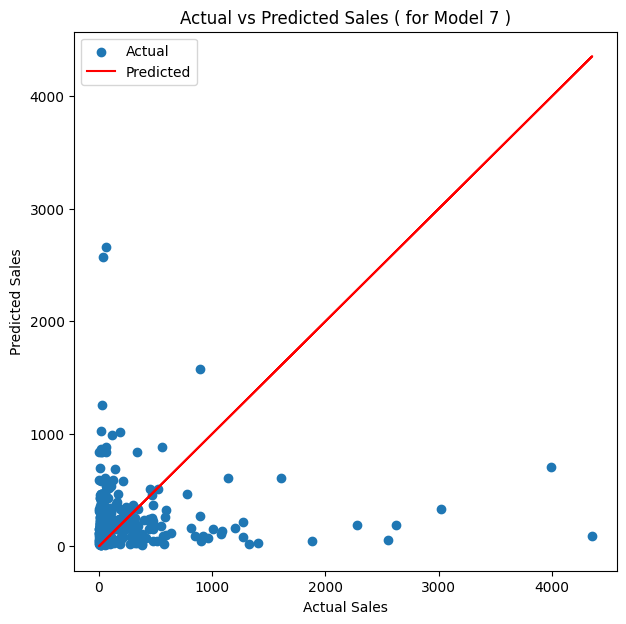

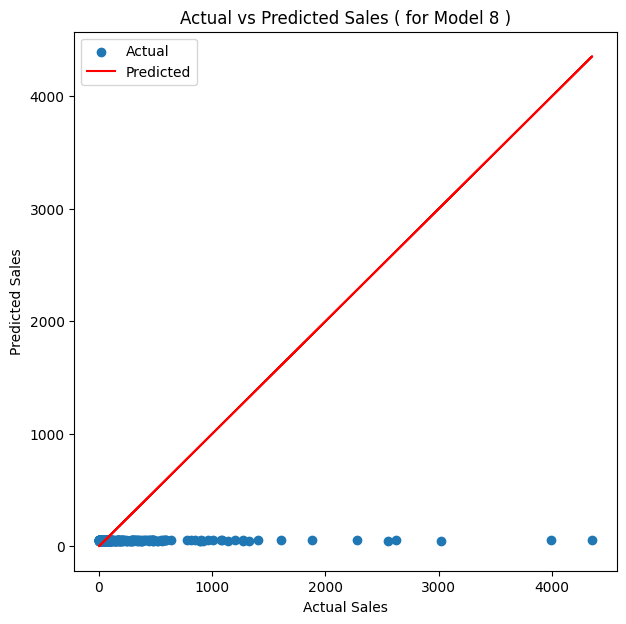

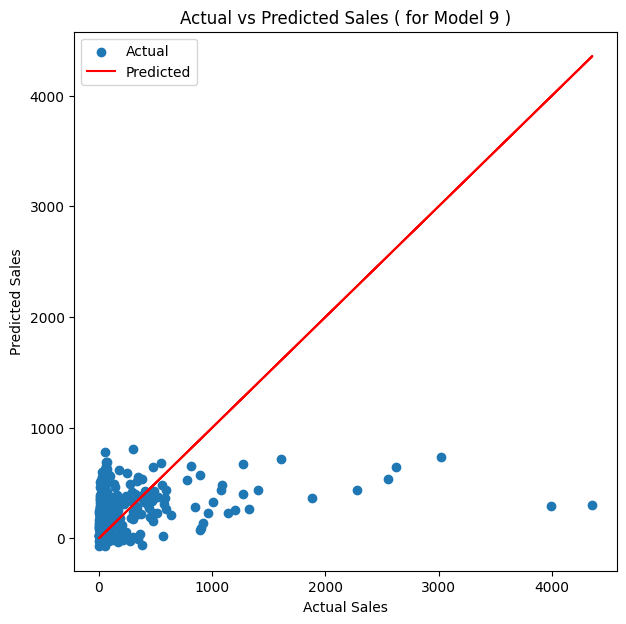

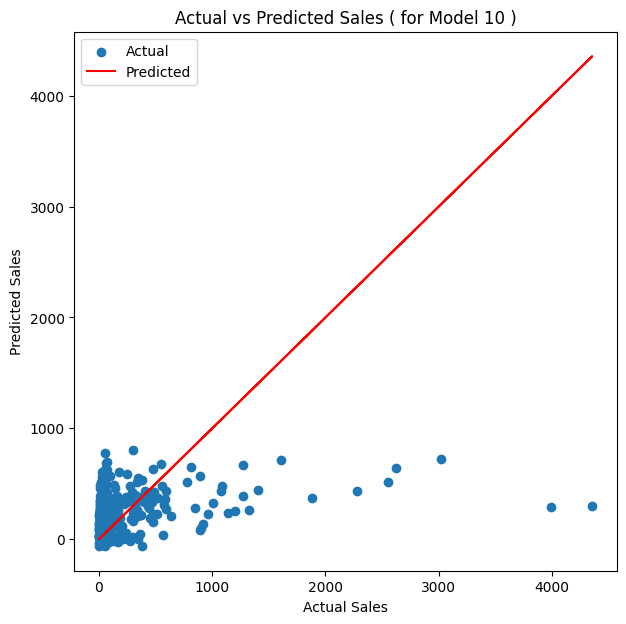

In [32]:
j=1
for i in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10]:
  plt.figure(figsize=(7,7))
  plt.scatter(y_test,i)
  plt.plot(y_test,y_test,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.show()
  print("\n")
  j+=1

In [33]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10], axis=0)
print("Mean Squared Error:", mean_squared_error(y_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_final))
print("Explained Variance Score:", explained_variance_score(y_test, pred_final))
print("R2 Score:", r2_score(y_test, pred_final))

Mean Squared Error: 181364.13900956616
Root Mean Squared Error: 425.86868751948197
Mean Absolute Error: 222.94312666764964
Explained Variance Score: 0.22338910674608303
R2 Score: 0.21483163449386433


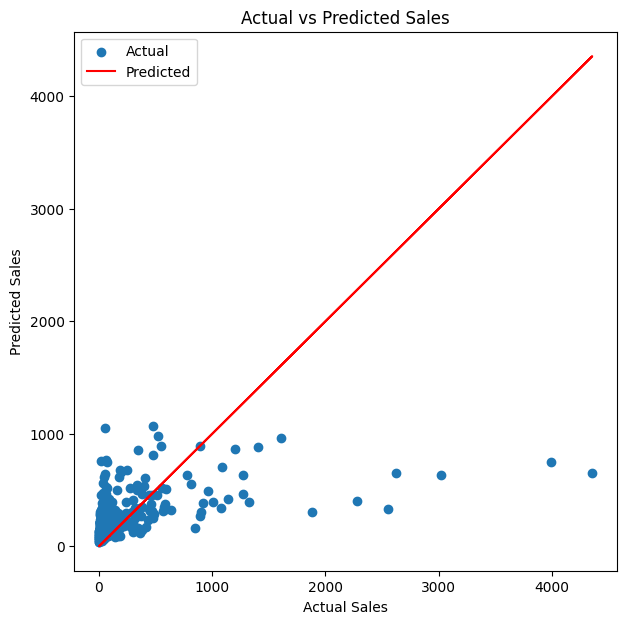

In [34]:
plt.figure(figsize=(7,7))
plt.scatter(y_test,pred_final)
plt.plot(y_test,y_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Sales")
plt.show()


In [35]:
m=home_office_mod.drop(columns=['Profit'],axis='1')
n=home_office_mod['Profit']
m_train,m_test,n_train,n_test=train_test_split(m,n,test_size=0.2,random_state=42)

In [36]:
model_1.fit(m_train, n_train)
model_2.fit(m_train, n_train)
model_3.fit(m_train, n_train)
model_4.fit(m_train, n_train)
model_5.fit(m_train, n_train)
model_6.fit(m_train, n_train)
model_7.fit(m_train, n_train)
model_8.fit(m_train, n_train)
model_9.fit(m_train, n_train)
model_10.fit(m_train, n_train)

Lasso()

In [37]:
pred_1 = model_1.predict(m_test)
pred_2 = model_2.predict(m_test)
pred_3 = model_3.predict(m_test)
pred_4=model_4.predict(m_test)
pred_5=model_5.predict(m_test)
pred_6=model_6.predict(m_test)
pred_7=model_7.predict(m_test)
pred_8=model_8.predict(m_test)
pred_9=model_9.predict(m_test)
pred_10=model_10.predict(m_test)

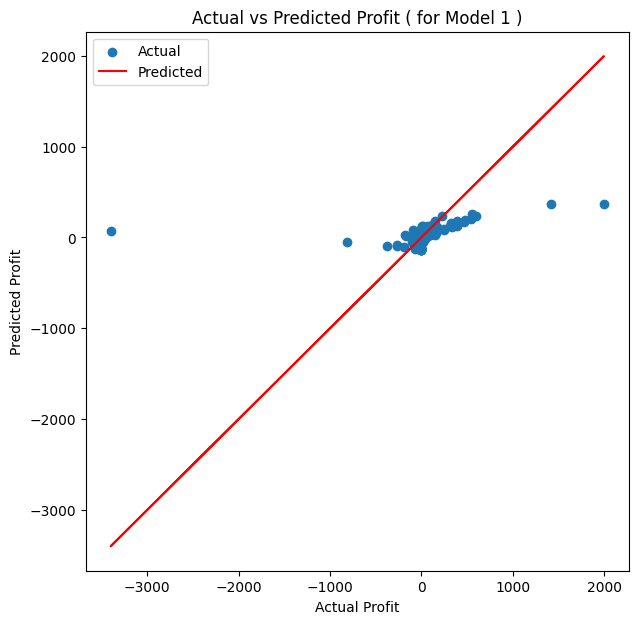

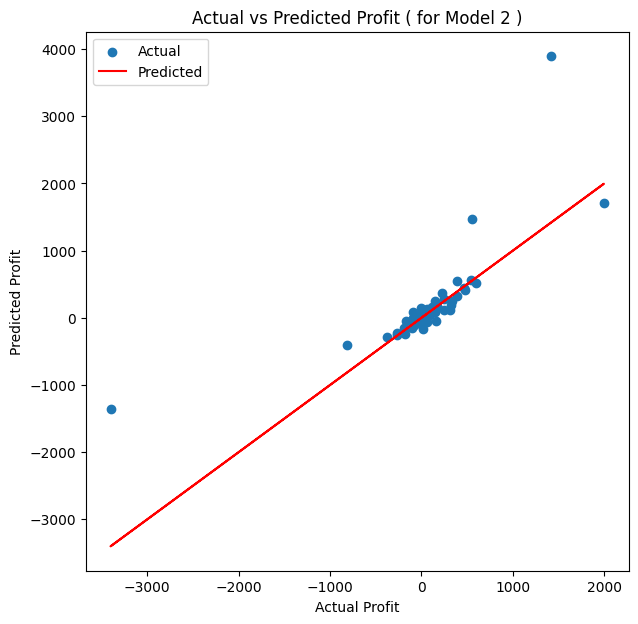

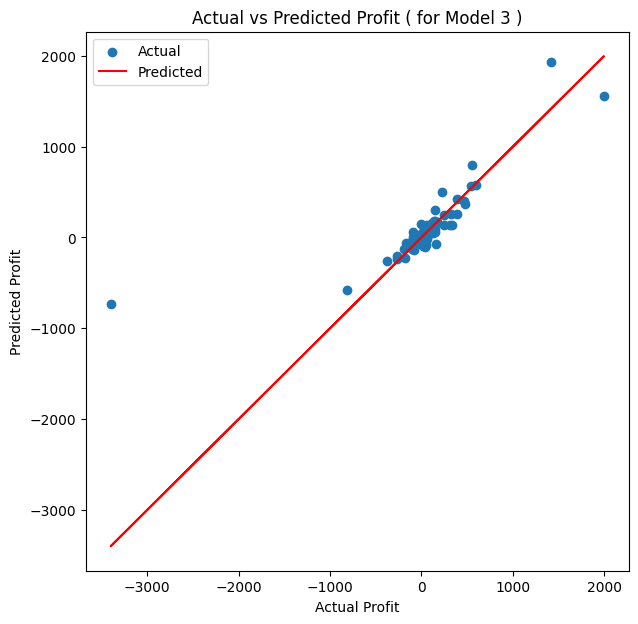

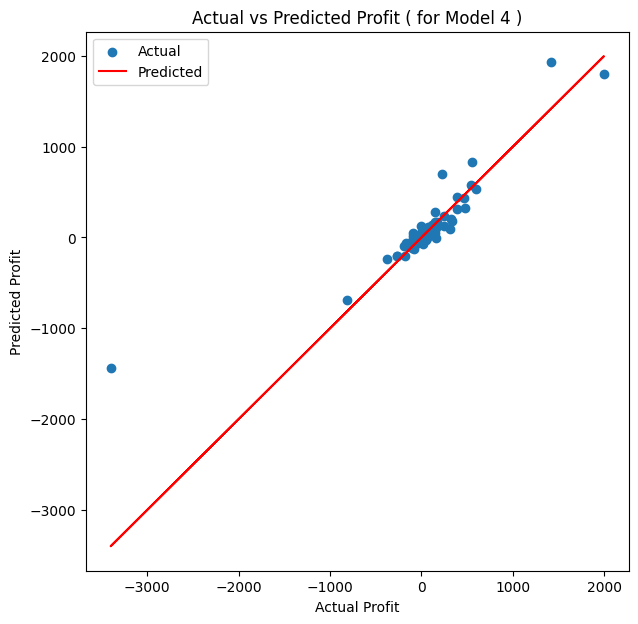

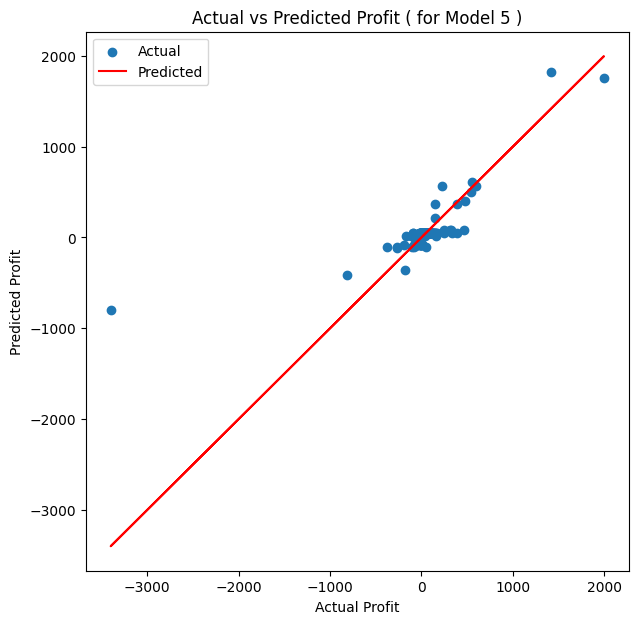

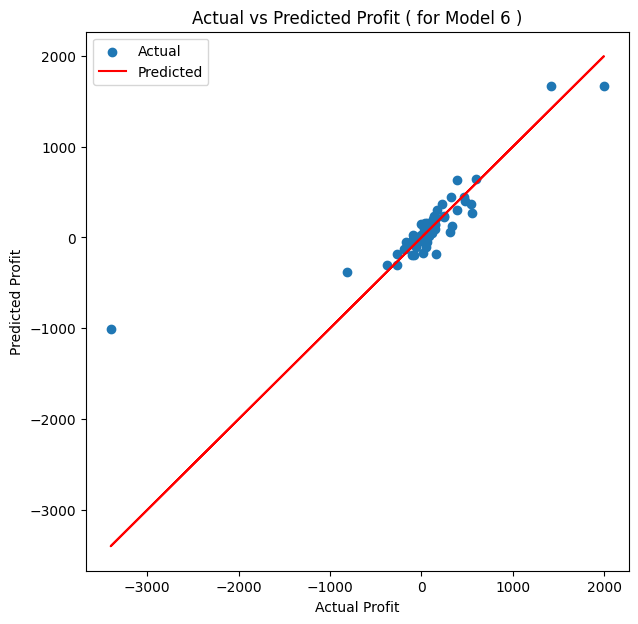

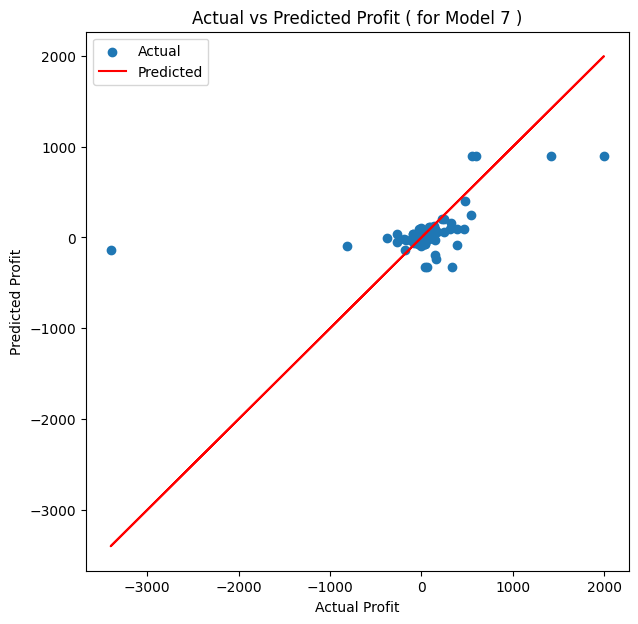

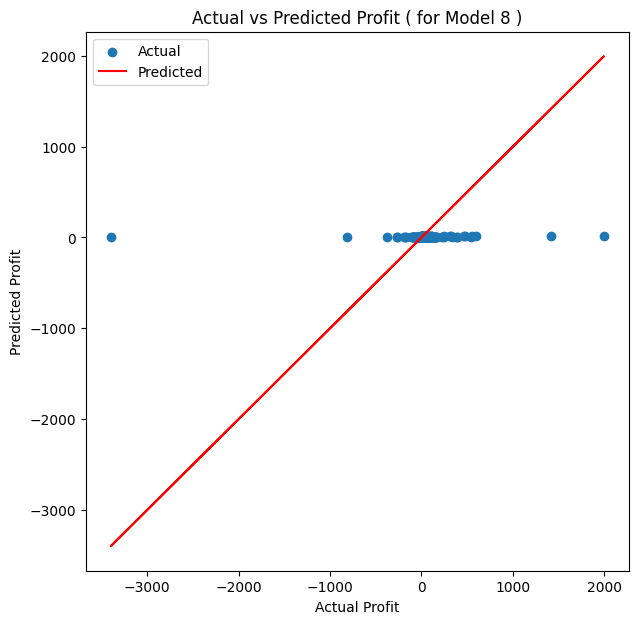

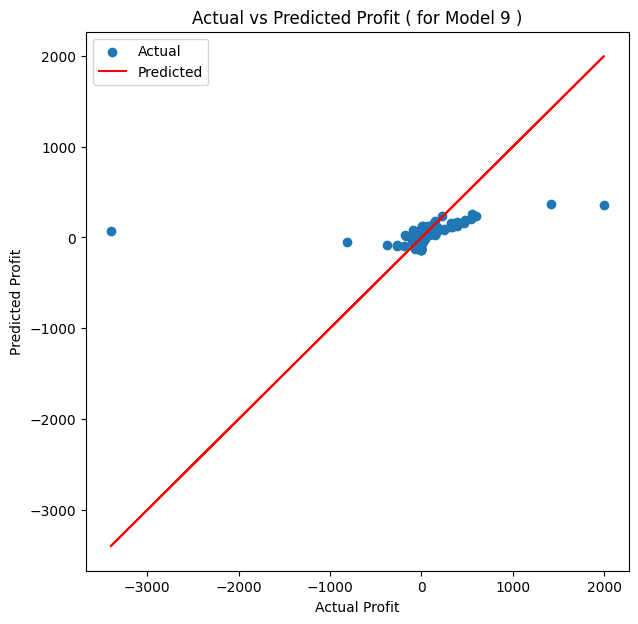

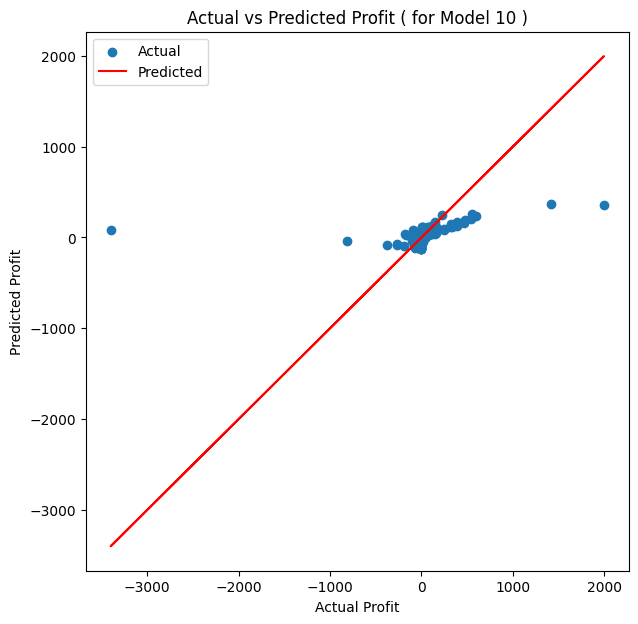

In [38]:
j=1
for i in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10]:
  plt.figure(figsize=(7,7))
  plt.scatter(n_test,i)
  plt.plot(n_test,n_test,'r')
  plt.xlabel("Actual Profit")
  plt.ylabel(f"Predicted Profit")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Profit ( for Model {j} )")
  plt.show()
  print("\n")
  j+=1


In [39]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10], axis=0)
print("Mean Squared Error:", mean_squared_error(n_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(n_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(n_test, pred_final))
print("Explained Variance Score:", explained_variance_score(n_test, pred_final))
print("R2 Score:", r2_score(n_test, pred_final))

Mean Squared Error: 28794.414583262427
Root Mean Squared Error: 169.68917049494476
Mean Absolute Error: 38.968160329264414
Explained Variance Score: 0.5166910752662244
R2 Score: 0.516096685798217


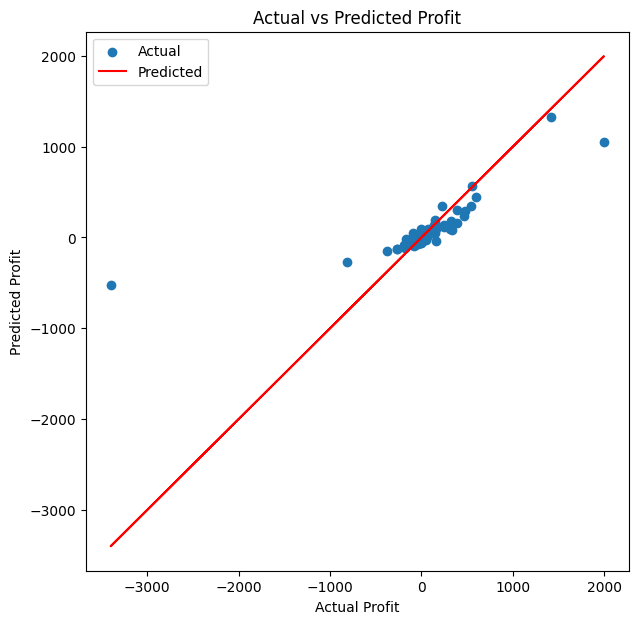

In [40]:
plt.figure(figsize=(7,7))
plt.scatter(n_test,pred_final)
plt.plot(n_test,n_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Profit")
plt.show()